In [25]:
from juliacall import Main as jl
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

###################################################
plt.rcParams['text.usetex'] = True
plt.rcParams.update({'font.size': 25})
plt.rcParams.update({'figure.facecolor': 'white'})
plt.rcParams.update({'savefig.facecolor': 'white'})
###########################################

"""For high dimensions, it is much easier to sample from distribution then compute marginals, 
instead of computing marginals from the pdf """

# colors
blue, orange, magenta, grey, green = '#0db4c3', '#eea021', '#ff0364', '#606172', '#3fb532'

# ===========================================================================


#long to run???
jl.seval("""using SequentialMeasureTransport""")
jl.seval("""import SequentialMeasureTransport as SMT""")
jl.seval("""using Distributions""")
jl.seval("""using PythonCall""")






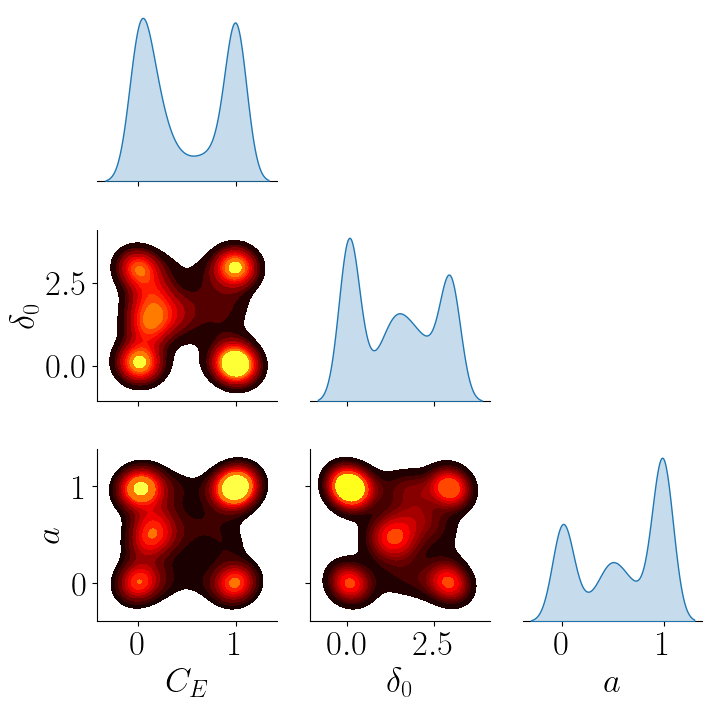

In [12]:
sampler_name = 'sampler_likelihood3_N30_L10_phi50_algb1_2.jld2'
print('Load sampler and sample')
jl.seval(f"""sampler = SMT.load_sampler("{sampler_name}")""")
jl.seval("""sample30 = rand(sampler, 1000) #""")
#jl.seval("""pdf(sampler,zeros(5))""")
#convert to numpy
sample_py = np.array(jl.seval(""" Py(hcat(sample30...)) """))


#convert to Panda dataframe
df = pd.DataFrame(sample_py.T, columns=[r'$C_E$', r'$\delta_0$', r'$a$'])

g = sns.PairGrid(df, diag_sharey=False, corner=True)
#g.map_upper(sns.jointplot)
#g.map_upper(sns.histplot)
#g.map_lower(sns.heatmap, color=blue)
# g.map_lower(sns.scatterplot)

# g.map_diag(sns.histplot, kde=True, color=orange )

g = g.map_upper(sns.scatterplot,marker='+')
g = g.map_lower(sns.kdeplot, cmap="hot",fill=True)
g = g.map_diag(sns.kdeplot, fill=True)
plt.show()

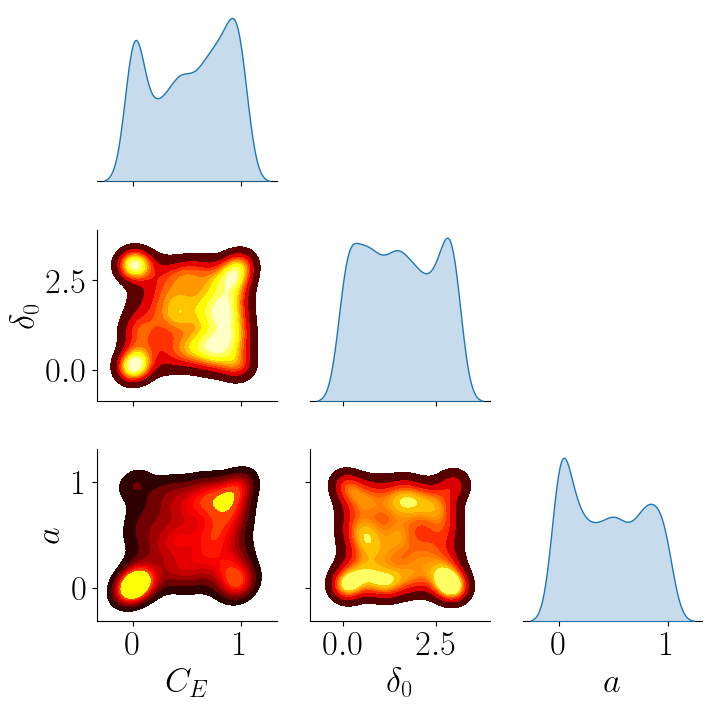

In [ ]:
sampler_name = 'sampler_likelihood3_N500_L8_phi50_algb1_2.jld2'
print('Load sampler and sample')
jl.seval(f"""sampler = SMT.load_sampler("{sampler_name}")""")
jl.seval("""sample = rand(sampler, 1000) #""")
#jl.seval("""pdf(sampler,zeros(5))""")

#convert to numpy
sample_py = np.array(jl.seval(""" Py(hcat(sample...)) """))


#convert to Panda dataframe
df = pd.DataFrame(sample_py.T, columns=[r'$C_E$', r'$\delta_0$', r'$a$'])

g = sns.PairGrid(df, diag_sharey=False, corner=True)
#g.map_upper(sns.jointplot)
#g.map_upper(sns.histplot)
#g.map_lower(sns.heatmap, color=blue)
# g.map_lower(sns.scatterplot)

# g.map_diag(sns.histplot, kde=True, color=orange )

g = g.map_upper(sns.scatterplot,marker='+')
g = g.map_lower(sns.kdeplot, cmap="hot",fill=True)
g = g.map_diag(sns.kdeplot, fill=True)
plt.show()

Load sampler and sample


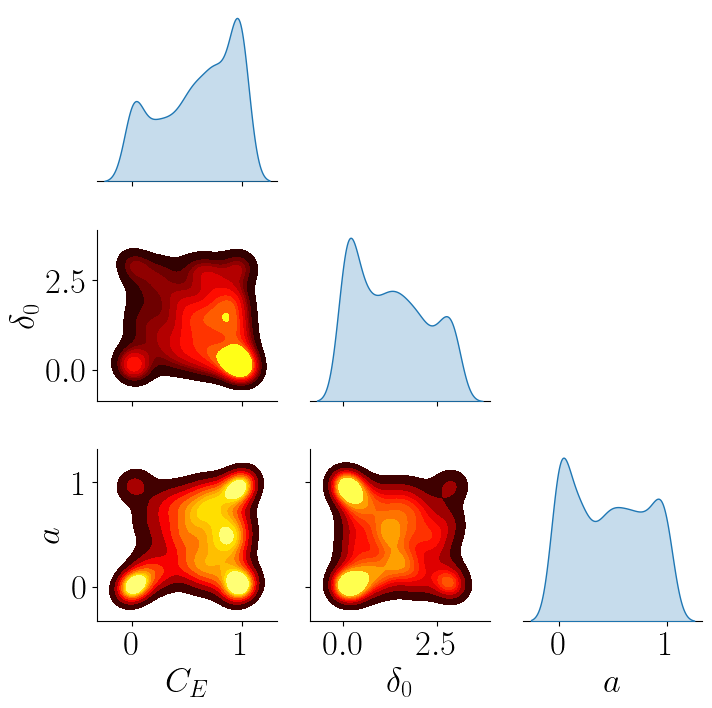

In [18]:
sampler_name = 'sampler_likelihood3_N300_L8_phi50_algb1_2.jld2'
print('Load sampler and sample')
jl.seval(f"""sampler = SMT.load_sampler("{sampler_name}")""")
jl.seval("""sample1 = rand(sampler, 1000) #""")
#jl.seval("""pdf(sampler,zeros(5))""")

#convert to numpy
sample_py = np.array(jl.seval(""" Py(hcat(sample1...)) """))


#convert to Panda dataframe
df = pd.DataFrame(sample_py.T, columns=[r'$C_E$', r'$\delta_0$', r'$a$'])

g = sns.PairGrid(df, diag_sharey=False, corner=True)
#g.map_upper(sns.jointplot)
#g.map_upper(sns.histplot)
#g.map_lower(sns.heatmap, color=blue)
# g.map_lower(sns.scatterplot)

# g.map_diag(sns.histplot, kde=True, color=orange )

g = g.map_upper(sns.scatterplot,marker='+')
g = g.map_lower(sns.kdeplot, cmap="hot",fill=True)
g = g.map_diag(sns.kdeplot, fill=True)
plt.show()

In [11]:
sampler_name = 'sampler_likelihood3_N300_L8_phi50_algb1_2_lambda2_1e-4.jld2'
print('Load sampler and sample')
jl.seval(f"""smp = SMT.load_sampler("{sampler_name}")""")
jl.seval("""pdf(smp,[0.5,0.5,0.5])""") 

Load sampler and sample


0.18128308442369562

In [28]:
jl.seval("""x=[0.5,0.5,0.5]""")
jl.seval("""pdf(smp,x)""") 

0.18128308442369562

In [27]:
x1=[0.5,0.5,0.5]
jl.x = x1
jl.seval("""pdf(smp,x)""") 

JuliaError: MethodError: no method matching pdf(::SequentialMeasureTransport.CondSampler{3, 0, Float64, SequentialMeasureTransport.ReferenceMaps.ScalingReference{3, 0, Float64}, SequentialMeasureTransport.ReferenceMaps.ScalingReference{3, 0, Float64}}, ::PyList{Any})

Closest candidates are:
  pdf(::SequentialMeasureTransport.CondSampler{d, <:Any, T}, !Matched::AbstractVector{T}) where {d, T<:Number}
   @ SequentialMeasureTransport ~/.julia/packages/SequentialMeasureTransport/OT6Ih/src/Samplers/samplers/Sampler.jl:218
  pdf(::SequentialMeasureTransport.AbstractCondSampler, !Matched::AbstractVector{T} where T<:Number)
   @ SequentialMeasureTransport ~/.julia/packages/SequentialMeasureTransport/OT6Ih/src/Samplers/sampler.jl:223

Stacktrace:
 [1] top-level scope
   @ none:1
 [2] eval
   @ ./boot.jl:385 [inlined]
 [3] eval
   @ ./Base.jl:88 [inlined]
 [4] pyjlmodule_seval(self::Module, expr::Py)
   @ PythonCall.JlWrap ~/.julia/packages/PythonCall/bb3ax/src/JlWrap/module.jl:13
 [5] _pyjl_callmethod(f::Any, self_::Ptr{PythonCall.C.PyObject}, args_::Ptr{PythonCall.C.PyObject}, nargs::Int64)
   @ PythonCall.JlWrap ~/.julia/packages/PythonCall/bb3ax/src/JlWrap/base.jl:66
 [6] _pyjl_callmethod(o::Ptr{PythonCall.C.PyObject}, args::Ptr{PythonCall.C.PyObject})
   @ PythonCall.JlWrap.Cjl ~/.julia/packages/PythonCall/bb3ax/src/JlWrap/C.jl:63

In [32]:
jl_x1

'Base.Vector{Float64}($x1)'

In [34]:
smp_py = jl.smp

In [36]:
smp_py

SelfReinforcedSampler{d=3, T=Float64}
8 layers
  reference map: SequentialMeasureTransport.ReferenceMaps.ScalingReference{3, 0, Float64}([0.0, 0.030000000000000002, 0.0], [0.999, 3.0, 0.99], 2.9373597000000005, 2.9373597000000005), SequentialMeasureTransport.ReferenceMaps.ScalingReference{3, 0, Float64}([0.0, 0.030000000000000002, 0.0], [0.999, 3.0, 0.99], 2.9373597000000005, 2.9373597000000005)


In [43]:
# Convert Python list to Julia array
x1 = np.array([0.5, 0.5, 0.5])
# Use the converted array in Julia code
smp_instance = jl.smp
result = jl.pdf(smp_instance, x1)
print(result)


0.18128308442369562


In [ ]:
# Convert Python list to Julia array
x1 = [0.5, 0.5, 0.5]
jl_x1 = jl.Base.convert(jl.Vector{jl.Float64}, x1)

# Use the converted array in Julia code
smp_instance = jl.smp()
result = jl.pdf(smp_instance, jl_x1)

In [12]:
f = lambda x: jl.seval("""pdf(smp,x)""") 

In [23]:
def pdf_py(x):
    jl.x1 = x
    return jl.seval("""pdf(smp,x1))""")


In [24]:
x=[0.5,0.5,0.5]
f(x)

JuliaError: MethodError: no method matching pdf(::SequentialMeasureTransport.CondSampler{3, 0, Float64, SequentialMeasureTransport.ReferenceMaps.ScalingReference{3, 0, Float64}, SequentialMeasureTransport.ReferenceMaps.ScalingReference{3, 0, Float64}}, ::PyList{Any})

Closest candidates are:
  pdf(::SequentialMeasureTransport.CondSampler{d, <:Any, T}, !Matched::AbstractVector{T}) where {d, T<:Number}
   @ SequentialMeasureTransport ~/.julia/packages/SequentialMeasureTransport/OT6Ih/src/Samplers/samplers/Sampler.jl:218
  pdf(::SequentialMeasureTransport.AbstractCondSampler, !Matched::AbstractVector{T} where T<:Number)
   @ SequentialMeasureTransport ~/.julia/packages/SequentialMeasureTransport/OT6Ih/src/Samplers/sampler.jl:223

Stacktrace:
 [1] top-level scope
   @ none:1
 [2] eval
   @ ./boot.jl:385 [inlined]
 [3] eval
   @ ./Base.jl:88 [inlined]
 [4] pyjlmodule_seval(self::Module, expr::Py)
   @ PythonCall.JlWrap ~/.julia/packages/PythonCall/bb3ax/src/JlWrap/module.jl:13
 [5] _pyjl_callmethod(f::Any, self_::Ptr{PythonCall.C.PyObject}, args_::Ptr{PythonCall.C.PyObject}, nargs::Int64)
   @ PythonCall.JlWrap ~/.julia/packages/PythonCall/bb3ax/src/JlWrap/base.jl:66
 [6] _pyjl_callmethod(o::Ptr{PythonCall.C.PyObject}, args::Ptr{PythonCall.C.PyObject})
   @ PythonCall.JlWrap.Cjl ~/.julia/packages/PythonCall/bb3ax/src/JlWrap/C.jl:63

Load sampler and sample


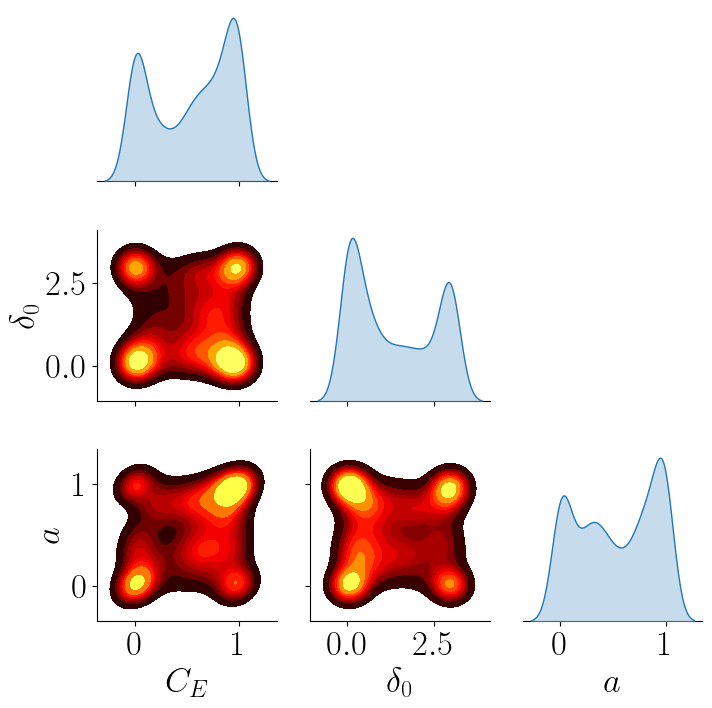

In [2]:
sampler_name = 'sampler_likelihood3_N300_L8_phi50_algb1_2_lambda2_1e-4.jld2'
print('Load sampler and sample')
jl.seval(f"""sampler = SMT.load_sampler("{sampler_name}")""")
jl.seval("""sample1 = rand(sampler, 1000) #""")
#jl.seval("""pdf(sampler,zeros(5))""")

#convert to numpy
sample_py = np.array(jl.seval(""" Py(hcat(sample1...)) """))


#convert to Panda dataframe
df = pd.DataFrame(sample_py.T, columns=[r'$C_E$', r'$\delta_0$', r'$a$'])

g = sns.PairGrid(df, diag_sharey=False, corner=True)
#g.map_upper(sns.jointplot)
#g.map_upper(sns.histplot)
#g.map_lower(sns.heatmap, color=blue)
# g.map_lower(sns.scatterplot)

# g.map_diag(sns.histplot, kde=True, color=orange )

g = g.map_upper(sns.scatterplot,marker='+')
g = g.map_lower(sns.kdeplot, cmap="hot",fill=True)
g = g.map_diag(sns.kdeplot, fill=True)
plt.show()


In [ ]:
from juliacall import Main as jl
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


jl.seval("""using SequentialMeasureTransport""")
jl.seval("""import SequentialMeasureTransport as SMT""")
jl.seval("""using Distributions""")
jl.seval("""using PythonCall""")
